## Modeling

### Model Setup

<p style="text-align: left;"> 
Before we begin modeling there are some tasks that we need to carry out in order for the models to work properly.  We'll begin by loading our libraries, after that we'll load our prepped dataset, then the categorical features will need to be one-hot encoded, and finally we'll be ready to split our dataset for modeling.
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder

<p style="text-align: left;"> 
With our needed libraries loaded we can load our dataset and examine the data to ensure the data loaded properly.
</p>

In [2]:
#Load in preped LC dataset
loans = pd.read_csv('C:/Users/russd/Documents/Flatiron/Phase_3/Lending_Club_Loan_Processing/data/alt_loans.csv', index_col=0)
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,0,gt10 years,RENT,...,1.0,35.0,63.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,171.62
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,1,lt1 year,RENT,...,5.0,35.0,63.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,119.66
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,2,gt10 years,RENT,...,2.0,35.0,63.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,649.91
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,3,gt10 years,RENT,...,1.0,35.0,63.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,357.48
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,4,1 year,RENT,...,0.0,38.0,63.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,67.30


In [3]:
#Setting target and predictor variables
y = loans['loan_status']
X = loans.drop('loan_status', axis=1)

In [4]:
#One-Hot encoding categorical features
X_scaled = pd.get_dummies(X, drop_first=True, dtype=float)
X_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,zip_code,addr_state,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,10.65,162.87,0,24000.0,860,0,27.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,15.27,59.83,1,30000.0,309,1,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,15.96,84.33,2,12252.0,606,2,8.72,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10000.0,10000.0,10000.0,13.49,339.31,3,49200.0,917,3,20.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3000.0,3000.0,3000.0,12.69,67.79,4,80000.0,972,4,17.94,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
#Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

<p style="text-align: left;"> 
Our target feature values are currently in the form of "Fully Paid" or "Charged Off".  Some of our models and evaluation classes need these values to be in numerical form. Therefore we'll need to encode them.
</p>

In [6]:
#Encoding target feature
lb_enc = LabelEncoder()

y_train = pd.Series(lb_enc.fit_transform(y_train))

y_test = pd.Series(lb_enc.transform(y_test))

<p style="text-align: left;"> 
We'll look at three differnt models and move forward with the one that performs the best.  The models will be Logistic Regression, Random Forest, and Xgbost.
</p>

### Logistic Regression Model

In [7]:
#Instantiating logreg variable
logreg = LogisticRegression(max_iter=10000)
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(max_iter=10000)

In [8]:
#Making Logistic Regression predictions
log_y_hat_train = logreg.predict(X_train)
log_y_hat_test = logreg.predict(X_test)

In [9]:
#Training accuracy
residuals_train = np.abs(y_train == log_y_hat_train)
print(pd.Series(residuals_train).value_counts())
print('------------------------------------')
print(pd.Series(residuals_train).value_counts(normalize=True))

True     36445
False     1051
dtype: int64
------------------------------------
True     0.97197
False    0.02803
dtype: float64


In [10]:
#Test accuracy
residuals_test = np.abs(y_test == log_y_hat_test)
print(pd.Series(residuals_test).value_counts())
print('------------------------------------')
print(pd.Series(residuals_test).value_counts(normalize=True))

True     12150
False      349
dtype: int64
------------------------------------
True     0.972078
False    0.027922
dtype: float64


<AxesSubplot:ylabel='Feature'>

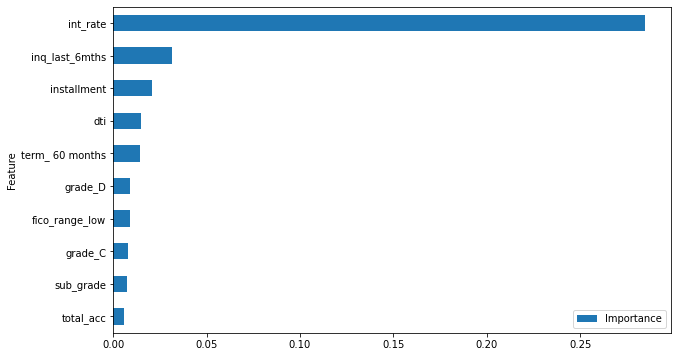

In [11]:
#Examining top model features
log_coefficients = logreg.coef_[0]

log_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(log_coefficients)})
log_feature_importance = log_feature_importance.sort_values('Importance', ascending=True)
log_feature_importance = log_feature_importance.iloc[-10:]
log_feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [12]:
#Train classification report
print(classification_report(y_train, log_y_hat_train))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      5772
           1       0.97      0.99      0.98     31724

    accuracy                           0.97     37496
   macro avg       0.97      0.92      0.94     37496
weighted avg       0.97      0.97      0.97     37496



In [13]:
#Test classification report
print(classification_report(y_test, log_y_hat_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1825
           1       0.97      0.99      0.98     10674

    accuracy                           0.97     12499
   macro avg       0.97      0.92      0.94     12499
weighted avg       0.97      0.97      0.97     12499



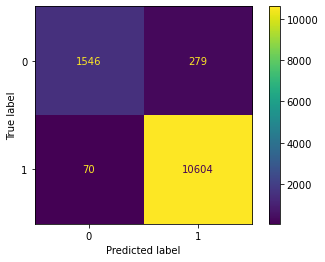

In [14]:
#Test confusion matrix
log_cm = confusion_matrix(y_test, log_y_hat_test)
log_cmd = ConfusionMatrixDisplay(confusion_matrix=log_cm)
log_cmd.plot()
plt.show()

### Random Forest Model

In [15]:
#Instantiating RandomForest variable
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
#Training accuracy
rfc.score(X_train, y_train)

1.0

In [17]:
#Test accuracy
rfc.score(X_test, y_test)

0.9617569405552444

<AxesSubplot:ylabel='Feature'>

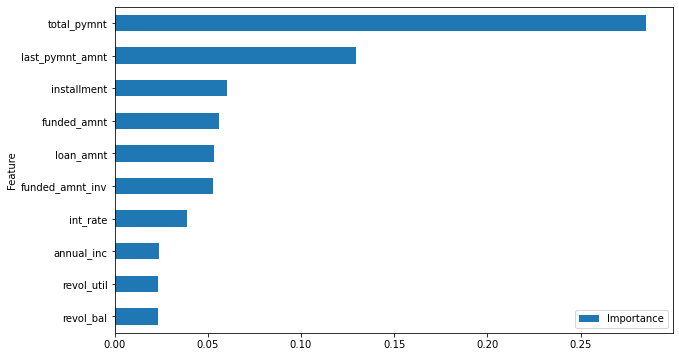

In [18]:
#Examining top model features
rf_coefficients = rfc.feature_importances_

rf_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(rf_coefficients)})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=True)
rf_feature_importance = rf_feature_importance.iloc[-10:]
rf_feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [19]:
#Making RandomForest predictions
rf_y_hat_train = rfc.predict(X_train)
rf_y_hat_test = rfc.predict(X_test)

In [20]:
#Train classification report
print(classification_report(y_train, rf_y_hat_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5772
           1       1.00      1.00      1.00     31724

    accuracy                           1.00     37496
   macro avg       1.00      1.00      1.00     37496
weighted avg       1.00      1.00      1.00     37496



In [21]:
#Test classification report
print(classification_report(y_test, rf_y_hat_test))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1825
           1       0.96      1.00      0.98     10674

    accuracy                           0.96     12499
   macro avg       0.98      0.87      0.91     12499
weighted avg       0.96      0.96      0.96     12499



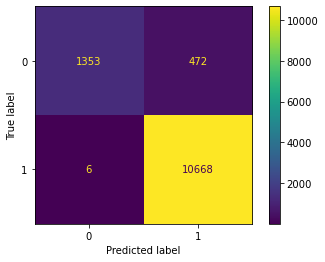

In [22]:
#Test confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_hat_test)
rf_cmd = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_cmd.plot()
plt.show()

### XGBoost Model

In [23]:
#Instantiating XGBoost variable and calculating accuracies
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

training_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 99.81%
Validation accuracy: 98.42%


In [24]:
#Train classification report
print(classification_report(y_train, training_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5772
           1       1.00      1.00      1.00     31724

    accuracy                           1.00     37496
   macro avg       1.00      0.99      1.00     37496
weighted avg       1.00      1.00      1.00     37496



In [25]:
#Test classification report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1825
           1       0.98      1.00      0.99     10674

    accuracy                           0.98     12499
   macro avg       0.98      0.95      0.97     12499
weighted avg       0.98      0.98      0.98     12499



<AxesSubplot:ylabel='Feature'>

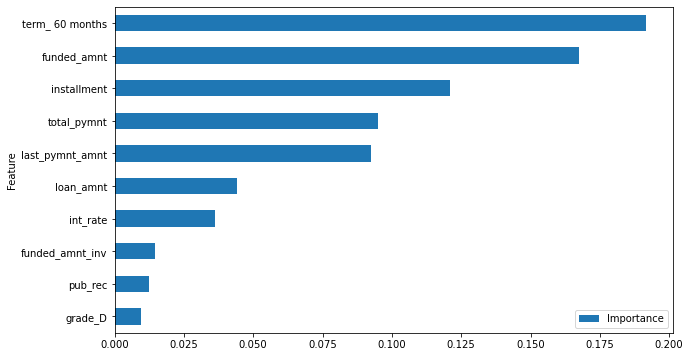

In [26]:
#Examining top model features
xgb_coefficients = xgb.feature_importances_

xgb_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(xgb_coefficients)})
xgb_feature_importance = xgb_feature_importance.sort_values('Importance', ascending=True)
xgb_feature_importance = xgb_feature_importance.iloc[-10:]
xgb_feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

<p style="text-align: left;"> 
Given that our XGBoost model scores better than our logistic model and our random forest model seems to  be overfitting, we'lll move forward with the XGBoost model.
</p>

In [27]:
#Setting parameter grid
xgb_param_grid = {
    'learning_rate': [0.3, 0.4, 0.5],
    'max_delta_step': [0, 1, 2],
    'max_depth': [4, 5, 6],
}

In [28]:
# Instantiate GridSearchCV variable
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, cv=3, return_train_score=True)

In [29]:
#Fitting Gridsearch variable
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [30]:
#Gridsearch predictions
xg_training_preds = xgb_grid_search.predict(X_train)
xg_test_preds = xgb_grid_search.predict(X_test)

In [31]:
#Train classification report
print(classification_report(y_train, xg_training_preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5772
           1       1.00      1.00      1.00     31724

    accuracy                           1.00     37496
   macro avg       1.00      0.99      1.00     37496
weighted avg       1.00      1.00      1.00     37496



In [32]:
#Test classification report
print(classification_report(y_test, xg_test_preds))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1825
           1       0.98      1.00      0.99     10674

    accuracy                           0.98     12499
   macro avg       0.98      0.95      0.97     12499
weighted avg       0.98      0.98      0.98     12499



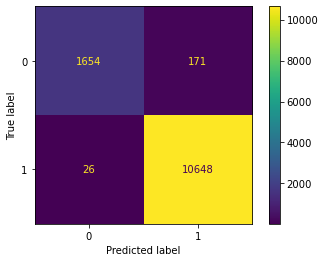

In [33]:
#Test confusion matrix
xg_cm = confusion_matrix(y_test, xg_test_preds)
xg_cmd = ConfusionMatrixDisplay(confusion_matrix=xg_cm)
xg_cmd.plot()
plt.show()

## Modeling Conclusions

<p style="text-align: left;"> 
After evaluating our models and trying to improve our best performing model, we have a model with an accuracy score of around 98%.  
</p>

<p style="text-align: left;"> 
According to our best performing model:
</p>
<ul>
  <li>The true positive rate is 85% (10,648/12,500)</li>
  <li>The true negative rate is 13% (1,654/12,500)</li>
  <li>The false positive rate is 1% (171/12,500)</li>
  <li>The false negative rate is .21% (26/12,500)</li>
</ul>

<p style="text-align: left;"> 
Considering that the objective of this project is to find the best features to use when determining if a borrower will pay their loan in full, the false positive rate is important. It would be more damaging for the project, to predict that a borrower will repay their loan but they actually don't repay.  This model had 171 FP predictions which was the lowest for any of our models.   
</p>

## Recommendations

<p style="text-align: left;"> 
Using our best performing model the top five features Lending Club should be concerned with when considering if a potential borrower will repay their loan or not are the following:
</p>
<ul>
  <li>Is the loan term 60 months?</li>
  <li>Consider the amount currently committed to the loan.</li>
  <li>Consider the monthly payment for the loan.</li>
  <li>Consider the payments recieved so far for the loan.</li>
  <li>Consider the last amount recieved as a payment.</li>
</ul>

## Next Steps

<p style="text-align: left;">
This project can be improved to more accurately predict borrower behavior by incorporating some improvement techniques.  With this in mind, some potential next steps aimed at improving model performance would be the following:

 - Use more records: Only using 50,000 records from this dataset is a very small fraction of what is available and different sampling or selection techniques could be beneficial.

 - Use more features: As stated earlier, in this project we only used 30 of the over 150 features so there may be other features that contribute greatly to borrower behavior.

 - Apply different model parameters: Each model has many parameters that can be configured to try and produce better predictions.
    
 - Employ different models: Using other machine learning models may result in better results.    
</p>